In [12]:
import pickle

data = None
labels = None

path = ''

with open(path+'img_data','rb') as f:
    data = pickle.load(f)
with open(path+'img_labels','rb') as f:
    labels = pickle.load(f)
    
print(data.shape, labels.shape)

(5966, 5120) (5966,)


In [13]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

h = 80
w = 64
ch = 1
data = data.reshape((data.shape[0], h, w, ch))

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.15)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_valid = to_categorical(y_valid)

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(4563, 80, 64, 1) (4563, 4)
(508, 80, 64, 1) (508, 4)
(895, 80, 64, 1) (895, 4)


Classifier
===

In [4]:
import keras 
from keras import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, MaxPool2D, Dropout
from keras.layers import BatchNormalization, Activation

NUM_EPOCHS=50

# 1. First CNN

In [ ]:
shape = x_train[0].shape
layer = [4, 8, 16, 32, 64, 88, 216]
pos = 1

model = Sequential()
model.add(Conv2D(layer[pos], (3, 3), padding='same', activation='relu', input_shape=shape ))
#model.add(Conv2D(layer[pos], (3, 3), padding='same', activation='relu', input_shape=shape ))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

pos += 1

model.add(Conv2D(layer[pos], (3, 3), padding='same', activation='relu'))
#model.add(Conv2D(layer[pos], (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

pos += 1

model.add(Conv2D(layer[pos], (3, 3), padding='same', activation='relu'))
#model.add(Conv2D(layer[pos], (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

pos += 1

model.add(Flatten())
model.add(Dense(96, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(4, activation='softmax'))
 
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 80, 64, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 40, 32, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 40, 32, 16)        1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 16, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 8, 32)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2560)             

Train on 4563 samples, validate on 508 samples
Epoch 1/50
4563/4563 [==============================] - 8s 2ms/step - loss: 1.1897 - accuracy: 0.4552 - val_loss: 0.9113 - val_accuracy: 0.6122
Epoch 2/50
4563/4563 [==============================] - 1s 326us/step - loss: 0.6899 - accuracy: 0.7022 - val_loss: 0.5322 - val_accuracy: 0.7717
Epoch 3/50
4563/4563 [==============================] - 1s 323us/step - loss: 0.5032 - accuracy: 0.7771 - val_loss: 0.4452 - val_accuracy: 0.8110
Epoch 4/50
4563/4563 [==============================] - 1s 325us/step - loss: 0.4421 - accuracy: 0.8030 - val_loss: 0.4277 - val_accuracy: 0.7972
Epoch 5/50
4563/4563 [==============================] - 1s 321us/step - loss: 0.4143 - accuracy: 0.8113 - val_loss: 0.4512 - val_accuracy: 0.7874
Epoch 6/50
4563/4563 [==============================] - 1s 319us/step - loss: 0.3990 - accuracy: 0.8190 - val_loss: 0.3599 - val_accuracy: 0.8622
Epoch 7/50
4563/4563 [==============================] - 1s 319us/step - loss: 0

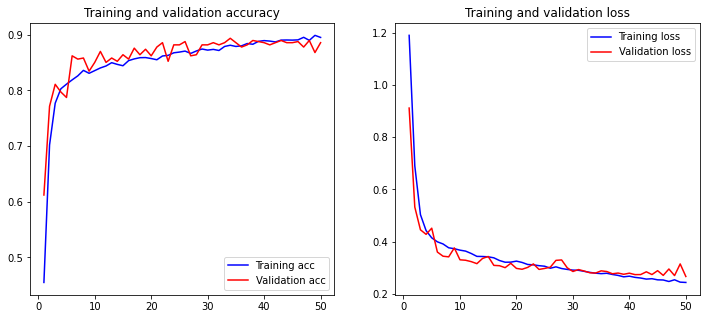

In [ ]:
history = model.fit(x_train, y_train, epochs=NUM_EPOCHS, validation_data=(x_valid, y_valid))

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss' )
plt.legend()
plt.show()

# 2. Data Augmentation

In [14]:
import PIL.Image as Image
from keras.preprocessing.image import array_to_img, img_to_array
import numpy as np

data_ag = []
lbl_ag = []

for img,lbl in zip(x_train, y_train):
    imag = array_to_img(img)
    for i in [Image.FLIP_LEFT_RIGHT, Image.FLIP_TOP_BOTTOM, Image.ROTATE_90, Image.ROTATE_180, Image.ROTATE_270]:
        imgg = imag.transpose(i)
        imgg = imgg.resize((64,80))
        imgg = img_to_array(imgg)
        imgg = imgg / 255.0
        data_ag.append(imgg)
        lbl_ag.append(lbl)
    imag = img_to_array(img)
    data_ag.append(img)
    lbl_ag.append(lbl)

data_ag = np.array(data_ag)
lbl_ag = np.array(lbl_ag)

print(data_ag.shape, lbl_ag.shape)

(27378, 80, 64, 1) (27378, 4)


Train on 27378 samples, validate on 508 samples
Epoch 1/50
27378/27378 [==============================] - 9s 321us/step - loss: 0.5529 - accuracy: 0.7617 - val_loss: 0.3178 - val_accuracy: 0.8681
Epoch 2/50
27378/27378 [==============================] - 9s 319us/step - loss: 0.4222 - accuracy: 0.8091 - val_loss: 0.3379 - val_accuracy: 0.8720
Epoch 3/50
27378/27378 [==============================] - 9s 311us/step - loss: 0.3887 - accuracy: 0.8230 - val_loss: 0.3192 - val_accuracy: 0.8701
Epoch 4/50
27378/27378 [==============================] - 8s 308us/step - loss: 0.3682 - accuracy: 0.8328 - val_loss: 0.3201 - val_accuracy: 0.8839
Epoch 5/50
27378/27378 [==============================] - 8s 307us/step - loss: 0.3549 - accuracy: 0.8393 - val_loss: 0.2748 - val_accuracy: 0.8878
Epoch 6/50
27378/27378 [==============================] - 8s 308us/step - loss: 0.3408 - accuracy: 0.8480 - val_loss: 0.2775 - val_accuracy: 0.8780
Epoch 7/50
27378/27378 [==============================] - 9s 315

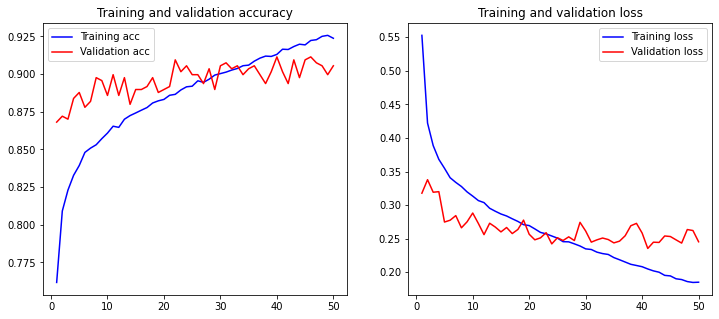

In [ ]:
history = model.fit(data_ag, lbl_ag, epochs=NUM_EPOCHS, validation_data=(x_valid, y_valid))

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss' )
plt.legend()
plt.show()

# 3. CNN with Regularization 
Noto un leggero overfitting, inserisco del kernel regularization al modello. Ovviamente eseguendo il fitting a posteriori della Data Augmentation.

In [15]:
import matplotlib.pyplot as plt

scores = []
for i in range(0,10):
    shape = x_train[0].shape
    layer = [4, 8, 16, 32, 64, 88, 216]
    pos = 1

    model = Sequential()
    model.add(Conv2D(layer[pos], (3, 3), padding='same', activation='relu', input_shape=shape, kernel_regularizer=keras.regularizers.l2(0.001) ))
    #model.add(Conv2D(layer[pos], (3, 3), padding='same', activation='relu', input_shape=shape ))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

    pos += 1

    model.add(Conv2D(layer[pos], (3, 3), padding='same', activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
    #model.add(Conv2D(layer[pos], (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    pos += 1

    model.add(Conv2D(layer[pos], (3, 3), padding='same', activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
    #model.add(Conv2D(layer[pos], (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    pos += 1

    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(96, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(4, activation='softmax'))
  
    adam = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    history = model.fit(data_ag, lbl_ag, epochs=20, validation_split=0.1, verbose=1, use_multiprocessing=True)

    val_acc = history.history['val_accuracy']
    score = np.mean(val_acc[-4:])
    print(i, score)
    scores.append(score)

Train on 24640 samples, validate on 2738 samples
Epoch 1/20
24640/24640 [==============================] - 9s 370us/step - loss: 1.0012 - accuracy: 0.5477 - val_loss: 0.6536 - val_accuracy: 0.6998
Epoch 2/20
24640/24640 [==============================] - 9s 357us/step - loss: 0.6280 - accuracy: 0.7251 - val_loss: 0.5295 - val_accuracy: 0.7626
Epoch 3/20
24640/24640 [==============================] - 9s 354us/step - loss: 0.5458 - accuracy: 0.7621 - val_loss: 0.4926 - val_accuracy: 0.7841
Epoch 4/20
24640/24640 [==============================] - 9s 353us/step - loss: 0.5074 - accuracy: 0.7781 - val_loss: 0.4759 - val_accuracy: 0.7904
Epoch 5/20
24640/24640 [==============================] - 9s 357us/step - loss: 0.4833 - accuracy: 0.7889 - val_loss: 0.4496 - val_accuracy: 0.7944
Epoch 6/20
24640/24640 [==============================] - 9s 353us/step - loss: 0.4652 - accuracy: 0.8010 - val_loss: 0.4457 - val_accuracy: 0.7973
Epoch 7/20
24640/24640 [==============================] - 9s 35

Train on 27378 samples, validate on 508 samples
Epoch 1/50
27378/27378 [==============================] - 10s 353us/step - loss: 1.0104 - accuracy: 0.5518 - val_loss: 0.6454 - val_accuracy: 0.7559
Epoch 2/50
27378/27378 [==============================] - 9s 337us/step - loss: 0.6388 - accuracy: 0.7286 - val_loss: 0.5228 - val_accuracy: 0.7894
Epoch 3/50
27378/27378 [==============================] - 9s 338us/step - loss: 0.5662 - accuracy: 0.7559 - val_loss: 0.4979 - val_accuracy: 0.7953
Epoch 4/50
27378/27378 [==============================] - 9s 335us/step - loss: 0.5288 - accuracy: 0.7732 - val_loss: 0.4443 - val_accuracy: 0.8307
Epoch 5/50
27378/27378 [==============================] - 9s 334us/step - loss: 0.5042 - accuracy: 0.7835 - val_loss: 0.4245 - val_accuracy: 0.8386
Epoch 6/50
27378/27378 [==============================] - 9s 331us/step - loss: 0.4832 - accuracy: 0.7903 - val_loss: 0.3987 - val_accuracy: 0.8386
Epoch 7/50
27378/27378 [==============================] - 9s 32

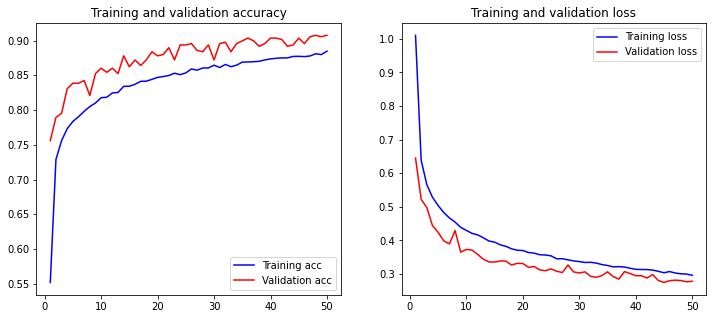

In [ ]:
history = model.fit(data_ag, lbl_ag, epochs=NUM_EPOCHS, validation_data=(x_valid, y_valid))

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss' )
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
 
y_pred = model.predict(x_test)

y_test_cp = np.argmax( y_test, axis=1)
y_pred_cp = np.argmax( y_pred, axis=1)
print()
dt = pd.DataFrame(confusion_matrix(y_test_cp, y_pred_cp))
display(dt)
print(classification_report(y_test_cp, y_pred_cp, zero_division=0))

,0,1,2,3
0,133,1,0,0
1,0,318,42,1
2,0,56,219,1
3,0,0,0,124


              precision    recall  f1-score   support

           0       1.00      0.99      1.00       134
           1       0.85      0.88      0.86       361
           2       0.84      0.79      0.82       276
           3       0.98      1.00      0.99       124

    accuracy                           0.89       895
   macro avg       0.92      0.92      0.92       895
weighted avg       0.89      0.89      0.89       895



In [ ]:
import pickle

with open('CLF_CNN_gray','wb') as f:
    pickle.dump(model, f)

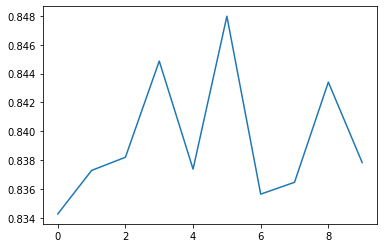

In [16]:
plt.figure()
plt.plot(scores)
plt.show()

In [ ]:
with open('CNN_score','wb') as f:
    pickle.dump(scores,f)